In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import faceted as faceted
import pandas as pd
import xarray as xr
import glob
import utils
import scipy.stats as stats

/home/tarshish/micromamba/envs/zec/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
utils.set_plot_configs(plt, fsize=8)

In [3]:
results_dir = utils.get_path('results')
datasets_dir = utils.get_path('datasets')

In [4]:
# Historical GMST data
df_gmst = pd.read_csv(datasets_dir+"/fair_calibrate/data/forcing/IGCC_GMST_1850-2022.csv")
gmst = df_gmst["gmst"].values

In [5]:
ds_decay = xr.open_mfdataset(results_dir+"/fair/*decay.nc")

In [6]:
ds_zec = xr.open_mfdataset(results_dir+"/fair/ssp*zec.nc")

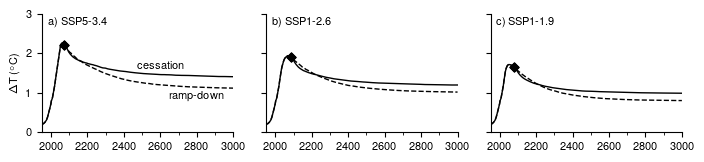

In [78]:
## markersize = 20
markershape = "D"
linewidth = 1
markersize = 20

fig, axes = faceted.faceted(1,3, width=7, left_pad=0.4,
                            right_pad=.2, top_pad=.1,
                              bottom_pad=0.3)

for scenario, axis in zip(['ssp534-over', 'ssp126', 'ssp119'], axes):
    
    for ds, linestyle in zip([ds_decay, ds_zec], ["dashed","solid"]):
        # Right-hand plot: time and temperature anomaly
            d = ds.temperature.sel(scenario=scenario).isel(layer=0).median("config")
            axis.plot(d.timebound, d, 
                      color="black", zorder=3,
                      linewidth=linewidth, label=utils.get_title(scenario),
                      linestyle=linestyle)
            
            # Scatter points for net-zero times and final temperatures
            net_zero_time = utils.get_net_zero_GHG_time(scenario) - 0.5
            axis.scatter(net_zero_time,
                        d.sel(timebound=net_zero_time),
                        zorder=5, color="black", 
                        marker=markershape, s=markersize)

axis.set_ylim([0, 3])
axis.set_xlim([1950, 3000])
axis.set_xticks(np.arange(2000, 3100, 100), minor=True)  # Simplified x-ticks for clarity
axis.set_xticks(np.arange(2000, 3100, 200))  # Simplified x-ticks for clarity

labels = ["a) SSP5-3.4", "b) SSP1-2.6", "c) SSP1-1.9"]

for ax, label in zip(axes, labels):
    ax.text(.03, .9, label, transform=ax.transAxes)

axes[0].set_ylabel(r"$\Delta$T (${}^\circ$C)")

axes[0].text(2600, 1.6, "cessation", ha="center")
axes[0].text(2800, .82, "ramp-down", ha="center")

sns.despine()

# Save and show the figure
fig.savefig(results_dir + "/figures/sfig_decay.pdf")
plt.show()